Proportion of CIs covering pop mean 0.93


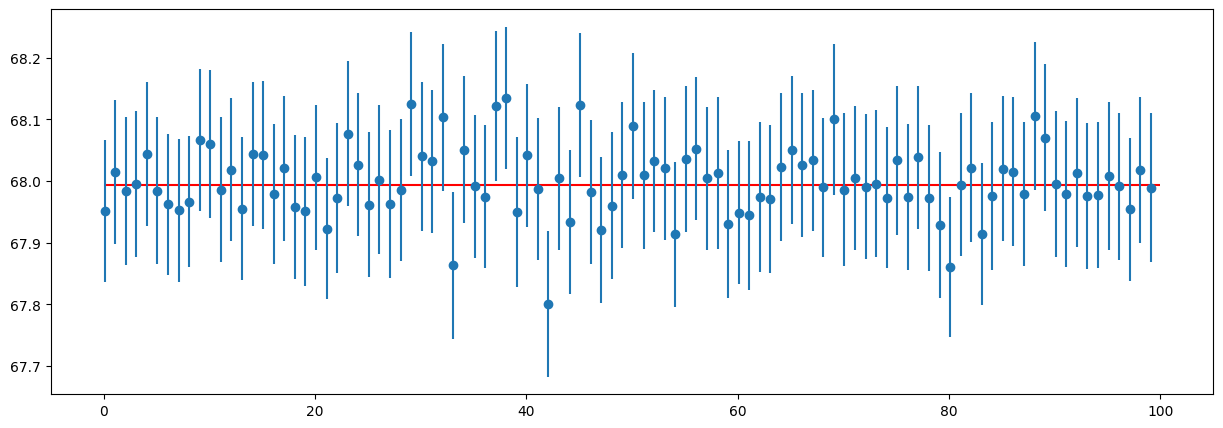

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm

df = pd.read_csv('height-weight.csv')
pop_mean = np.mean(df.height)

def sampling(sample_size,no_of_samples):
    sample_means = []
    intervals = []
    count = 0

    for i in range(no_of_samples):
        sample = df.height.sample(sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95,np.mean(sample),np.std(sample,ddof=1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean<=ci[1]:
            count = count + 1
    print('Proportion of CIs covering pop mean',count/no_of_samples)
    plt.figure(figsize=(15,5))
    plt.hlines(y=pop_mean, xmin=0,xmax=100,color='r')
    plt.errorbar(np.arange(0.1,100,1),sample_means,fmt='o',yerr=[(upp-low)/2 for low,upp in intervals])
    plt.show()

sampling(1000,100)
